In [45]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [46]:
df = pd.read_csv('placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


/tmp/ipykernel_13440/2703153272.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipykernel_13440/2703153272.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


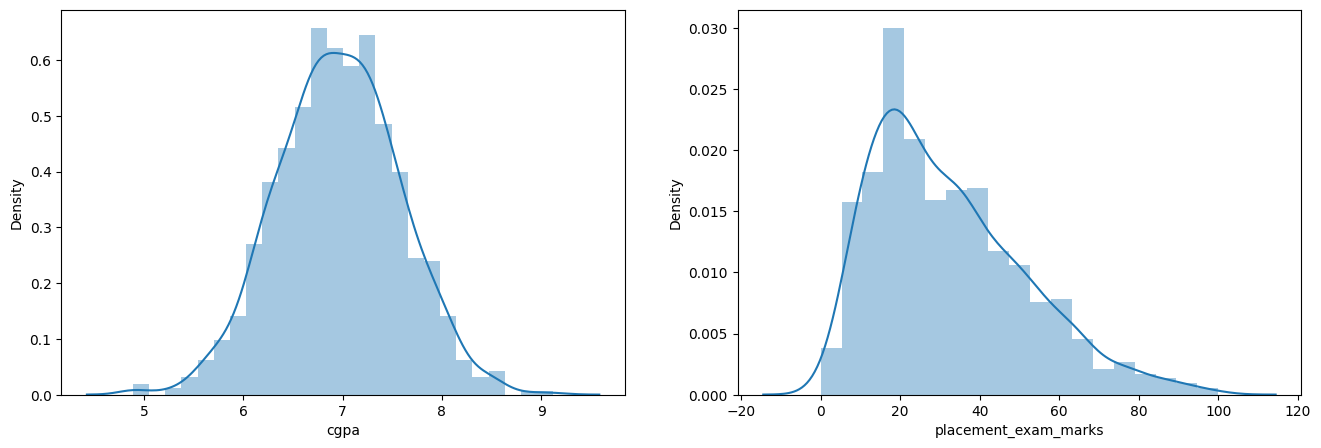

In [47]:
plt.figure(figsize = (16,5))

plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

plt.show()

<AxesSubplot: xlabel='cgpa'>

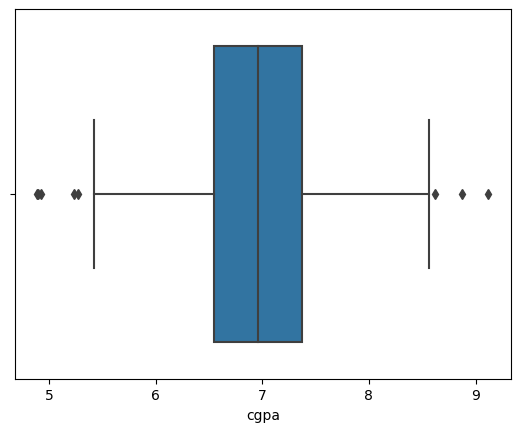

In [51]:
sns.boxplot(x=df['cgpa'])

In [52]:
print('Mean value of cgpa : ', df['cgpa'].mean())
print('Std value of cgpa : ', df['cgpa'].std())
print('Min value of cgpa : ', df['cgpa'].min())
print('Max value of cgpa : ', df['cgpa'].max())

Mean value of cgpa :  6.96124
Std value of cgpa :  0.6158978751323896
Min value of cgpa :  4.89
Max value of cgpa :  9.12


In [53]:
# Finding the boundary values

print('Highest allowed : ', df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest allowed : ', df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed :  8.808933625397168
Lowest allowed :  5.113546374602832


In [54]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [58]:
#trimming
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [61]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [63]:
print("Upper_limit",upper_limit)
print("lower_limit",lower_limit)

Upper_limit 8.808933625397168
lower_limit 5.113546374602832


In [67]:
df['cgpa'] = np.where(df['cgpa'] > upper_limit, upper_limit, np.where(df['cgpa'] < lower_limit, lower_limit, df['cgpa']))

In [68]:
df['cgpa']

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa, Length: 1000, dtype: float64

# # only for skew distribution

In [8]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [9]:
df['cgpa'].skew()

-0.014529938929314918

In [11]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot: xlabel='placement_exam_marks'>

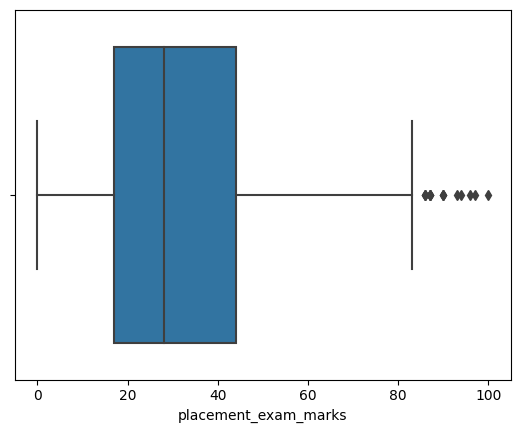

In [14]:
sns.boxplot(x=df['placement_exam_marks'])

In [15]:
#finding IQR
per25 = df['placement_exam_marks'].quantile(0.25)
per75 = df['placement_exam_marks'].quantile(0.75)

In [16]:
per25

17.0

In [17]:
per75

44.0

In [18]:
IQR = per75 - per25
IQR

27.0

In [19]:
upperlimit = per75 + 1.5 * IQR
lowerlimit = per25 - 1.5 * IQR

In [21]:
upperlimit

84.5

In [22]:
lowerlimit

-23.5

# Finding outliers

In [25]:
df[df['placement_exam_marks']>upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [28]:
df[df['placement_exam_marks']<lowerlimit]

,cgpa,placement_exam_marks,placed


# Trimming

In [30]:
new_df = df[df['placement_exam_marks'] < upperlimit] 

In [31]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<AxesSubplot: xlabel='placement_exam_marks'>

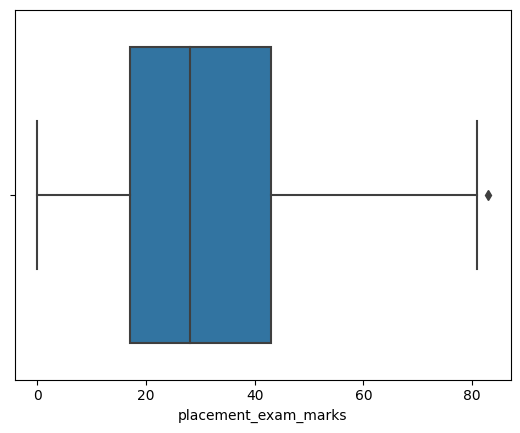

In [33]:
sns.boxplot(x=new_df['placement_exam_marks'])

# Capping

In [42]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upperlimit,
    upperlimit,
    np.where(
         new_df_cap['placement_exam_marks'] < lowerlimit,
        lowerlimit,
        new_df_cap['placement_exam_marks']
    
    )
)

In [39]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<AxesSubplot: xlabel='placement_exam_marks'>

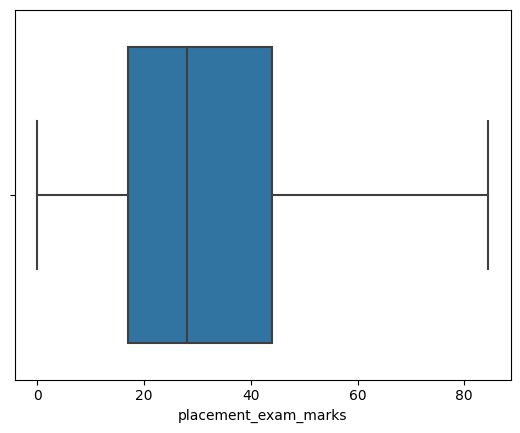

In [43]:
sns.boxplot(x=new_df_cap['placement_exam_marks'])